In [1]:
import os
import cv2
import glob
import time
import random
import shutil #拷贝文件
import numpy as np
import mpl_toolkits
import imgaug as ia
import pandas as pd
from progressbar import * #进度条
from natsort import natsorted
import matplotlib.pyplot as plt
from skimage import io,transform
from imgaug import augmenters as iaa
from imgaug import parameters as iap
from skimage.io import imread, imsave

In [2]:
'''
训练数据按类型分类
'''
def split_data_as_class(data_path='data', new_data_floder = 'data/new_train'):  
    files = glob.glob(data_path + '/train/*')
    labels = pd.read_csv(data_path + '/trainLabels.csv')
    total = len(files)
    pbar = ProgressBar().start()
    for i, file_path in enumerate(files):
        pbar.update(int((i / (total - 1)) * 100))#进度条
        time.sleep(0.01)
        
        idx =  file_path.split('/')[-1][:-4]
        label = labels[labels.id == int(idx)].label.tolist()[0]
        new_floder = new_data_floder + '/' + label
        if not os.path.exists(new_floder):
            os.makedirs(new_floder)
        new_file_path = new_floder + '/' + file_path.split("/")[-1]
        shutil.copyfile(file_path, new_file_path)
    pbar.finish()
    #print('Finish!')

In [3]:
split_data_as_class()

100% |########################################################################|


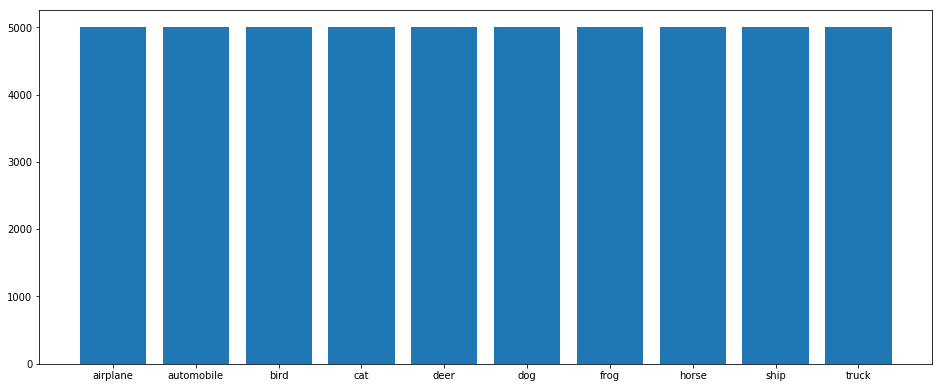

In [4]:
'''
原始数据分析
'''
### 数目统计
floders = natsorted(glob.glob('data/new_train/*'))
classes = []
file_num = []
for i, floder in enumerate(floders):
    floder_name = floder.split("/")[-1]
    classes.append(floder_name)
    file_num.append(len(glob.glob(floder + '/*')))
#print(classes)
plt.figure(figsize=(16, 6.5))
plt.bar(range(len(file_num)), file_num, tick_label=classes)
plt.show()

/home/lhw/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/lhw/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


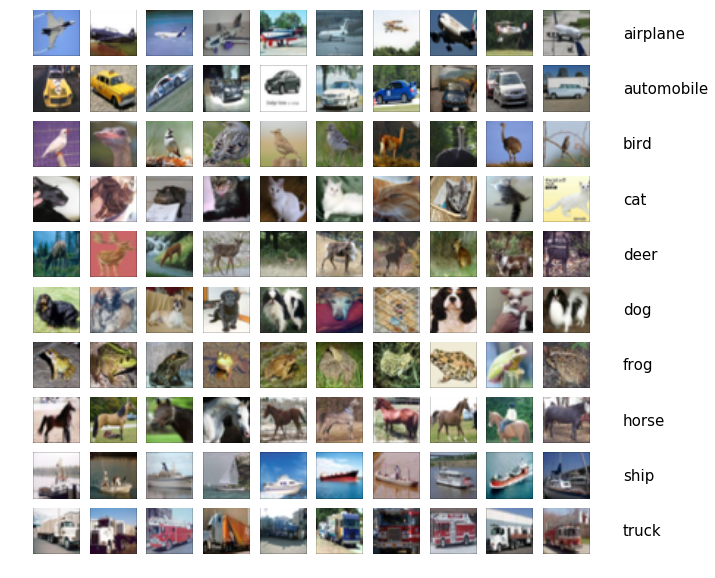

训练数据总数为:50000, 图片最大的尺寸为：(32, 32), 最小的尺寸为: (32, 32)


In [6]:
### 数据可视化 ###
plt.figure(figsize=(11, 10))
num_classes = len(classes)
sample_pre_class = 10

min_area = 10000
min_rows = 0
min_cols = 0
max_area = 0
max_rows = 0
max_cols = 0
number = 0
for i, floder in enumerate(floders):
    files = glob.glob(floder + '/*')
    number += len(files)
    samples = random.sample(files, sample_pre_class)
    for idx, file in enumerate(samples):
        img = imread(file)
        #计算大小
        rows, cols = img.shape[0], img.shape[1]
        if cols * rows < min_area:
            min_rows = rows
            min_cols = cols
        if cols * rows > max_area:
            max_rows = rows
            max_cols = cols
        dst = transform.resize(img, (244, 244))
        plt_idx = i * (sample_pre_class+1) + idx + 1
        #print(i, idx, plt_idx)
        plt.subplot(num_classes, sample_pre_class+1, plt_idx)

        plt.imshow(dst)
        plt.axis('off')
        if idx == sample_pre_class-1:
            plt.subplot(num_classes, sample_pre_class+1, plt_idx+1)
            floder_name = floder.split("/")[-1]
            plt.text(0.5, 0.5, floder_name,size=15,  verticalalignment='center')
            plt.axis('off')
plt.show()  
print('训练数据总数为:%d, 图片最大的尺寸为：(%d, %d), 最小的尺寸为: (%d, %d)' %(number, max_cols, max_rows, min_cols, min_rows))